# MATH 360 Introduction to Mathematical Modelling

### Modelling Assignment 5: Linear Regression

**Jincheng Hong**  
Collaborated with: Ethan Billings, Haad Bhutta

### Part 1: Construct the Model - Linear Regression

The dataset `concrete_data.csv` contains features that factor in to the compressive strength of concrete:
- the compressive strength in GPa
- the cement component in kg/m$^3$
- the water component as a percentage
- the coarse aggregate component in kg/m$^3$
- the fine aggregate component in kg/m$^3$.

Construct a mathematical model using linear regression for the `concrete_compressive_strength` variable following the **Tasks** below.

Present your work in a Jupyter notebook that includes:
- Problem statement
- Variable and parameter definitions 
- Assumptions and constraints
- Build solutions
- Analysis

Students work individually and submit their work in class.

## 1. Problem Statement

**Task:** Write a problem statement.

Construct a mathematical model predicting the compressive strength using features including: cement component, water component, coarse aggregate component and the fine aggregate component following the linear regression model.

## 2. Variables and Parameters  

**Task:** Complete the table parameters and variables.

Hint: It may be helpful to know that GPa is gigapascals, which is a unit of pressure.  One megapascal is equal to one billion pascals and a Pascal in scientific units is: Pa $ = \frac{\textrm{kg}}{\textrm{m s}}.$


| Description | Symbol | Units | Type|
|-------------|--------|-------|-------|
| Concrete Compressive Strength | $Y$ | GPa | target (dependent) variable |
| Cement Component | $X1$ | kg/m$^3$| feature (independent) variable |
| Water Component | $X2$ | - | feature (independent) variable |
| Coarse Aggregate Component | $X3$ | kg/m$^3$| feature (independent) variable |
| Fine Aggregate Component | $X4$ | kg/m$^3$| feature (independent) variable |
| regression coefficent for intercept | $\beta_0$ | GPa | parameter |
| regression coefficent for Cement Component | $\beta_1$ | m$^2$/s | parameter |
| regression coefficent for Water Component | $\beta_2$ | kg/(m s) | parameter |
| regression coefficent for Coarse Aggregate Component | $\beta_3$ | m$^2$/s | parameter |
| regression coefficent for Fine Aggregate Component | $\beta_4$ | m$^2$/s | parameter |
| residural | $\epsilon$ | GPa | parameter |


## 3. Assumptions and Constraints

**Task:** State assumptions and constraints. 

- The model follows the linear model $Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \beta_4 X_4 + \varepsilon$
- The average value of the error is 0: i.e., $\mathbb{E}(\epsilon_i) = 0$ for all $i$
- The variance of the error is constant: i.e., $Var(\epsilon_i) = \sigma^2$ for all $i$.
- The error $\vec{\epsilon}$ is a random sample from the normal distribution of zero mean and variance $\sigma^2$.
- The error is independent for each $\epsilon_i$ for all $i$.
- The features are independent of each other.
- The features are representative of the compressive strength.

## 4. Build Solutions

**Task:** Construct and run the linear regression model where `concrete_compressive_strength` is the output and `cement`,`water`, `course_aggregate`, and `fine_aggregate` are the inputs.

In [1]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
%matplotlib inline

print("packages imported")

packages imported


In [2]:
df = pd.read_csv("concrete_data.csv")
df = pd.DataFrame(df)
df.head()

,cement,water,coarse_aggregate,fine_aggregate,concrete_compressive_strength
0,540.0,0.923441,1040.0,676.0,0.006398
1,540.0,0.923441,1055.0,676.0,0.003830
2,332.5,0.985472,932.0,594.0,0.001622
3,332.5,0.985472,932.0,594.0,0.001685
4,198.6,0.954279,978.4,825.5,0.001962


In [3]:
X = df[['cement','water','coarse_aggregate','fine_aggregate']]
Y = df['concrete_compressive_strength']

In [4]:
# train the linear model
X = sm.add_constant(X)

reg_1 = sm.OLS(Y,X).fit()

summary_table=reg_1.summary()
summary_table

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     concrete_compressive_strength   R-squared:                       0.404
Model:                                       OLS   Adj. R-squared:                  0.402
Method:                            Least Squares   F-statistic:                     173.6
Date:                           Tue, 05 Dec 2023   Prob (F-statistic):          1.53e-113
Time:                                   13:32:51   Log-Likelihood:                 5606.1
No. Observations:                           1030   AIC:                        -1.120e+04
Df Residuals:                               1025   BIC:                        -1.118e+04
Df Model:                                      4                                         
Covariance Type:                       nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0364      0.002     16.664      0.000       0.032       0.041
cement            4.521e-06   3.38e-07     13.362      0.000    3.86e-06    5.19e-06
water               -0.0296      0.002    -16.256      0.000      -0.033      -0.026
coarse_aggregate -4.284e-06   4.58e-07     -9.362      0.000   -5.18e-06   -3.39e-06
fine_aggregate   -5.209e-06   5.05e-07    -10.308      0.000    -6.2e-06   -4.22e-06
==============================================================================
Omnibus:                      111.436   Durbin-Watson:                   1.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.955
Skew:                           0.767   Prob(JB):                     1.24e-37
Kurtosis:                       4.267   Cond. No.                     1.10e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The $R^2_{adj}$ is pretty low. This sugguests that our model is some kind of problematic.

## 5. Analyze and Assess

**Task:** Determine if the linear regression assumptions are satisfied for the model in the previous task. 

#### 5.1 Assumption: average value of the error is zero.

eval_env: 1


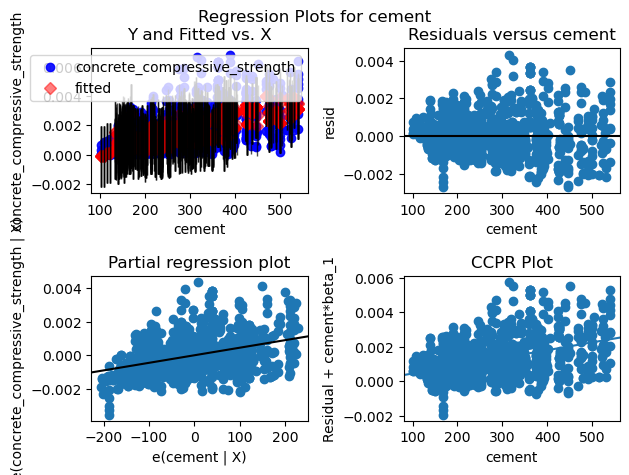

eval_env: 1


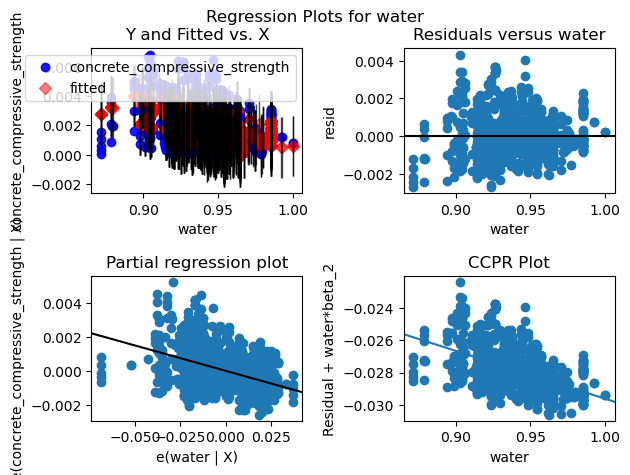

eval_env: 1


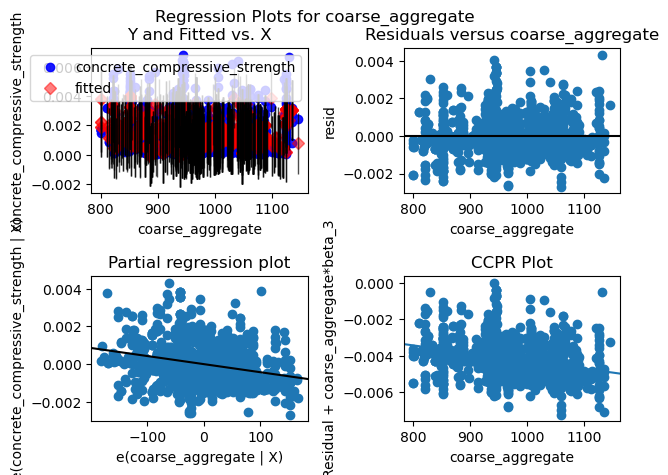

eval_env: 1


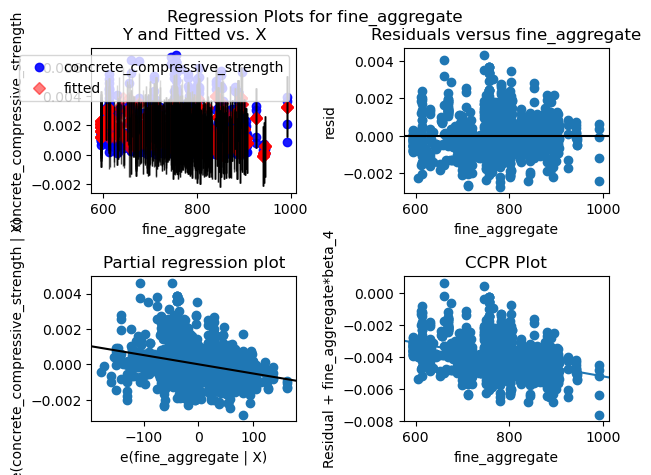

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


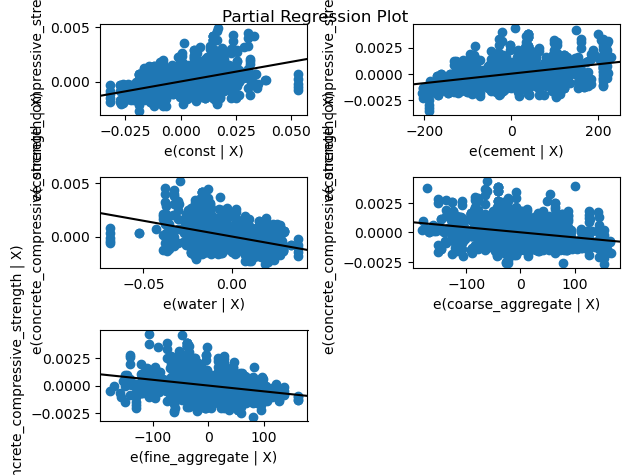

In [5]:
sm.graphics.plot_regress_exog(reg_1,"cement")
plt.show()

sm.graphics.plot_regress_exog(reg_1,"water")
plt.show()

sm.graphics.plot_regress_exog(reg_1,"coarse_aggregate")
plt.show()

sm.graphics.plot_regress_exog(reg_1,"fine_aggregate")
plt.show()

sm.graphics.plot_partregress_grid(reg_1)
plt.show()

The points seems random, although they are kind of condensed. However, the partial regression plot shows that the linear relationship is some kind of vague. The one regarding "water" may be the worst. This shows that this assumption is not properly met.

#### 5.2 Assumption: Variance is constant

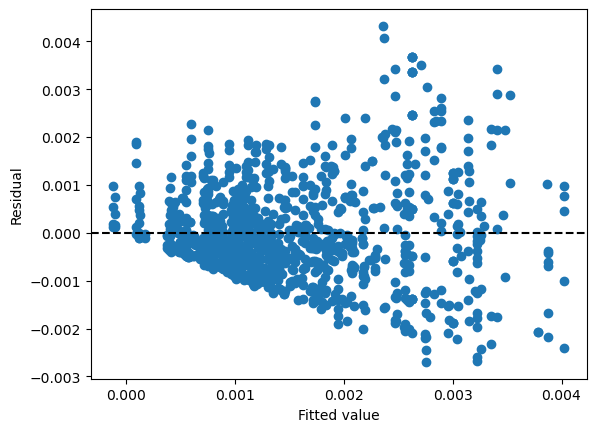

In [6]:
fitted_y = reg_1.fittedvalues

residuals = reg_1.resid

plt.scatter(fitted_y,residuals)
plt.axhline(y=0,color='k',linestyle = '--')
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.show()

This plot is also kind of problematic because the points seems have some pattern especially the low left part.

#### 5.3 Assumption: Errors are normally distributed

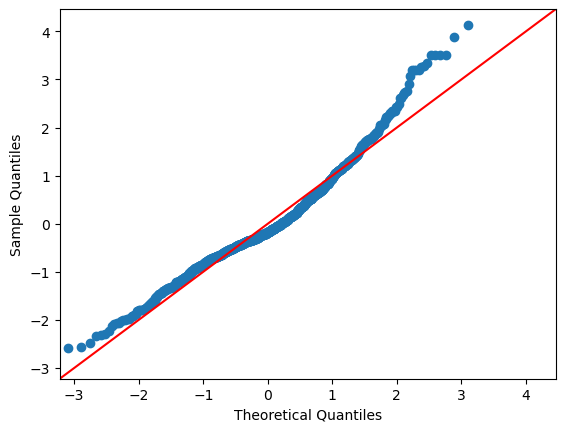

In [7]:
sm.qqplot(residuals, fit=True, line="45")
plt.show()

This plot is not very acceptable: the right part seems bad. With that trend, I don't think it's going to stick to the 45 degree lines afterwards.

Overall, these above plots show that we may have violate some assuptions about linear regression. Changes of the features are needed.

### 5.4 Try some transformation
**Task:**  The following are possible transformations that could be made to the `concrete_data.csv` inputs and output. These transformations can be used individually or in combination. 
1. `np.exp(water)`
2. `concrete_compressive_strength**2`
3. `np.sqrt(concrete_compressive_strength)`


Determine, with justification, the *best* linear regression model to use for the `concrete_data.csv`.  

#### 5.4.1. `np.exp(water)`

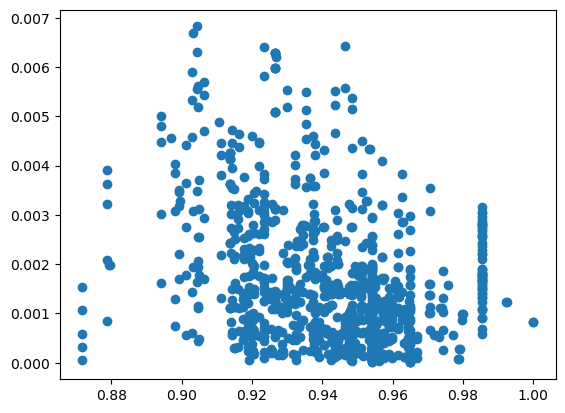

In [8]:
plt.scatter(df['water'],Y)
plt.show()

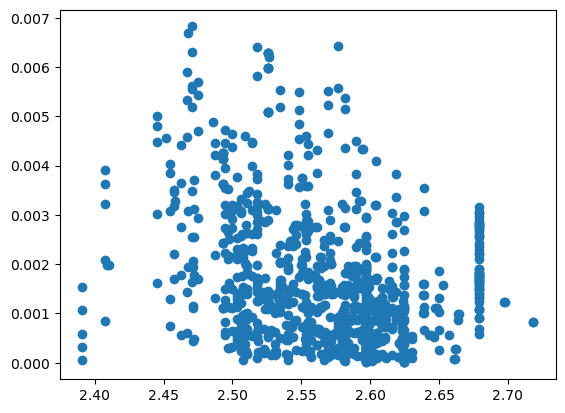

In [9]:
plt.scatter(np.exp(df['water']),Y)
plt.show()

The plot seems to be no much difference. Let's see the model.

In [10]:
x2 = df[['cement','coarse_aggregate','fine_aggregate']].copy()
exp_water = np.exp(df['water'])
x2["exp_water"] = exp_water
Y = df['concrete_compressive_strength']
x2.tail()

,cement,coarse_aggregate,fine_aggregate,exp_water
1025,276.4,870.1,768.3,2.565520
1026,322.2,817.9,813.4,2.606535
1027,148.5,892.4,780.0,2.598514
1028,159.1,989.6,788.9,2.555053
1029,260.9,864.5,761.5,2.617534


In [11]:
x2 = sm.add_constant(x2)

reg_2 = sm.OLS(Y,x2).fit()

summary_table=reg_2.summary()
summary_table

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     concrete_compressive_strength   R-squared:                       0.404
Model:                                       OLS   Adj. R-squared:                  0.401
Method:                            Least Squares   F-statistic:                     173.5
Date:                           Tue, 05 Dec 2023   Prob (F-statistic):          1.66e-113
Time:                                   13:32:52   Log-Likelihood:                 5606.0
No. Observations:                           1030   AIC:                        -1.120e+04
Df Residuals:                               1025   BIC:                        -1.118e+04
Df Model:                                      4                                         
Covariance Type:                       nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0383      0.002     16.670      0.000       0.034       0.043
cement            4.527e-06   3.38e-07     13.380      0.000    3.86e-06    5.19e-06
coarse_aggregate -4.315e-06   4.58e-07     -9.416      0.000   -5.21e-06   -3.42e-06
fine_aggregate   -5.239e-06   5.06e-07    -10.345      0.000   -6.23e-06   -4.25e-06
exp_water           -0.0116      0.001    -16.249      0.000      -0.013      -0.010
==============================================================================
Omnibus:                      111.398   Durbin-Watson:                   1.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.128
Skew:                           0.769   Prob(JB):                     1.88e-37
Kurtosis:                       4.255   Cond. No.                     9.36e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The $R^2_{adj}$ is a bit lower..., but what about the plots?

eval_env: 1


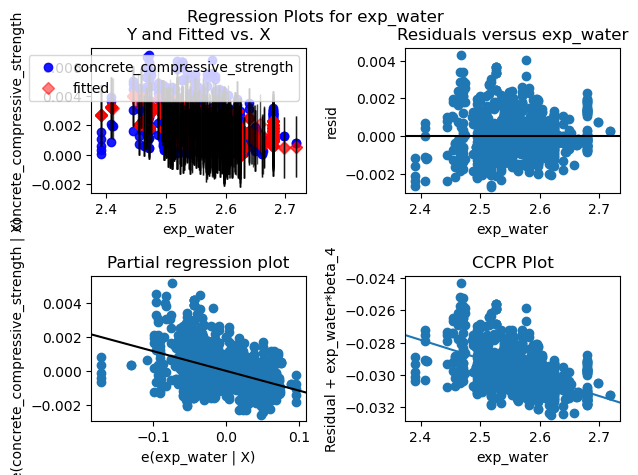

In [12]:
sm.graphics.plot_regress_exog(reg_2,"exp_water")
plt.show()

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


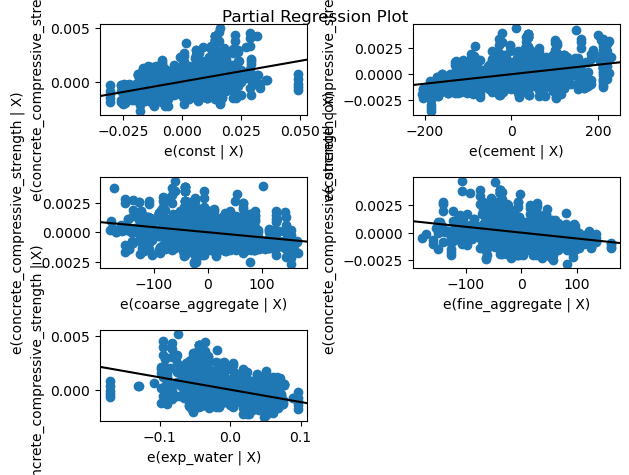

In [13]:
sm.graphics.plot_partregress_grid(reg_2)
plt.show()

Actually, not much difference. So, I'm not adopting this transformation.

#### 5.4.2.`concrete_compressive_strength**2`

In [14]:
X = df[['cement','water','coarse_aggregate','fine_aggregate']]
y2 = df['concrete_compressive_strength']**2

In [15]:
X = sm.add_constant(X)

reg_3 = sm.OLS(y2,X).fit()

summary_table=reg_3.summary()
summary_table

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     concrete_compressive_strength   R-squared:                       0.313
Model:                                       OLS   Adj. R-squared:                  0.310
Method:                            Least Squares   F-statistic:                     116.7
Date:                           Tue, 05 Dec 2023   Prob (F-statistic):           4.58e-82
Time:                                   13:32:53   Log-Likelihood:                 10929.
No. Observations:                           1030   AIC:                        -2.185e+04
Df Residuals:                               1025   BIC:                        -2.182e+04
Df Model:                                      4                                         
Covariance Type:                       nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0002   1.24e-05     13.563      0.000       0.000       0.000
cement             2.11e-08   1.93e-09     10.954      0.000    1.73e-08    2.49e-08
water               -0.0001   1.04e-05    -13.895      0.000      -0.000      -0.000
coarse_aggregate -1.811e-08   2.61e-09     -6.952      0.000   -2.32e-08    -1.3e-08
fine_aggregate   -2.181e-08   2.88e-09     -7.578      0.000   -2.75e-08   -1.62e-08
==============================================================================
Omnibus:                      541.922   Durbin-Watson:                   0.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4304.097
Skew:                           2.302   Prob(JB):                         0.00
Kurtosis:                      11.894   Cond. No.                     1.10e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Applying the same procedure as the first transformation, we can see that the model score is even lower: it drops from 0.4 to 0.3. Therefore, I'm not adopting this transformation.

#### 5.4.3. `np.sqrt(concrete_compressive_strength)`

In [16]:
X = df[['cement','water','coarse_aggregate','fine_aggregate']]
y3 = np.sqrt(df['concrete_compressive_strength'])

In [17]:
X = sm.add_constant(X)

reg_4 = sm.OLS(y3,X).fit()

summary_table=reg_4.summary()
summary_table

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     concrete_compressive_strength   R-squared:                       0.418
Model:                                       OLS   Adj. R-squared:                  0.415
Method:                            Least Squares   F-statistic:                     183.7
Date:                           Tue, 05 Dec 2023   Prob (F-statistic):          1.07e-118
Time:                                   13:32:53   Log-Likelihood:                 3032.1
No. Observations:                           1030   AIC:                            -6054.
Df Residuals:                               1025   BIC:                            -6030.
Df Model:                                      4                                         
Covariance Type:                       nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4711      0.027     17.717      0.000       0.419       0.523
cement            5.567e-05   4.12e-06     13.518      0.000    4.76e-05    6.37e-05
water               -0.3608      0.022    -16.272      0.000      -0.404      -0.317
coarse_aggregate -5.717e-05   5.57e-06    -10.266      0.000   -6.81e-05   -4.62e-05
fine_aggregate    -7.13e-05   6.15e-06    -11.593      0.000   -8.34e-05   -5.92e-05
==============================================================================
Omnibus:                       13.957   Durbin-Watson:                   1.240
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                9.703
Skew:                           0.109   Prob(JB):                      0.00782
Kurtosis:                       2.577   Cond. No.                     1.10e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

By the same procedure, we can finally see a slight increase in the model score. This implies we are moving towards the correct direction. I am adopting this transformation.

#### 5.4.4. `np.log(cement)`

In [18]:
x3 = df[['water','coarse_aggregate','fine_aggregate']].copy()
log_cement = np.log(df['cement'])
x3['log_cement'] = log_cement
y3 = np.sqrt(df['concrete_compressive_strength'])
x3.tail()

,water,coarse_aggregate,fine_aggregate,log_cement
1025,0.942161,870.1,768.3,5.621849
1026,0.958022,817.9,813.4,5.775172
1027,0.954940,892.4,780.0,5.000585
1028,0.938073,989.6,788.9,5.069533
1029,0.962233,864.5,761.5,5.564137


In [19]:
x3 = sm.add_constant(x3)

reg_5 = sm.OLS(y3,x3).fit()

summary_table=reg_5.summary()
summary_table

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     concrete_compressive_strength   R-squared:                       0.423
Model:                                       OLS   Adj. R-squared:                  0.420
Method:                            Least Squares   F-statistic:                     187.5
Date:                           Tue, 05 Dec 2023   Prob (F-statistic):          1.28e-120
Time:                                   13:32:53   Log-Likelihood:                 3036.6
No. Observations:                           1030   AIC:                            -6063.
Df Residuals:                               1025   BIC:                            -6038.
Df Model:                                      4                                         
Covariance Type:                       nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4108      0.028     14.536      0.000       0.355       0.466
water               -0.3666      0.022    -16.716      0.000      -0.410      -0.324
coarse_aggregate -5.953e-05    5.5e-06    -10.821      0.000   -7.03e-05   -4.87e-05
fine_aggregate   -7.386e-05   6.05e-06    -12.217      0.000   -8.57e-05    -6.2e-05
log_cement           0.0154      0.001     13.902      0.000       0.013       0.018
==============================================================================
Omnibus:                       15.185   Durbin-Watson:                   1.242
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               10.118
Skew:                           0.100   Prob(JB):                      0.00635
Kurtosis:                       2.557   Cond. No.                     1.11e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 5.4.5 What if they are of similar scale?

In [40]:
x4 = df[['cement','water','coarse_aggregate','fine_aggregate']].copy()
x4['cement'] = np.log(x4['cement'])
x4['water'] = 6*x4['water']
x4['coarse_aggregate'] = np.log(x4['coarse_aggregate'])
x4['fine_aggregate'] = np.log(x4['fine_aggregate'])
y3 = np.sqrt(df['concrete_compressive_strength'])
x4.tail()

,cement,water,coarse_aggregate,fine_aggregate
1025,5.621849,5.652967,6.768608,6.644180
1026,5.775172,5.748131,6.706740,6.701223
1027,5.000585,5.729639,6.793914,6.659294
1028,5.069533,5.628438,6.897301,6.670640
1029,5.564137,5.773395,6.762151,6.635290


In [41]:
x4 = sm.add_constant(x4)

reg_6 = sm.OLS(y3,x4).fit()

summary_table=reg_6.summary()
summary_table

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     concrete_compressive_strength   R-squared:                       0.421
Model:                                       OLS   Adj. R-squared:                  0.419
Method:                            Least Squares   F-statistic:                     186.3
Date:                           Tue, 05 Dec 2023   Prob (F-statistic):          5.11e-120
Time:                                   13:53:42   Log-Likelihood:                 3035.2
No. Observations:                           1030   AIC:                            -6060.
Df Residuals:                               1025   BIC:                            -6036.
Df Model:                                      4                                         
Covariance Type:                       nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.0493      0.069     15.143      0.000       0.913       1.185
cement               0.0152      0.001     13.662      0.000       0.013       0.017
water               -0.0608      0.004    -16.621      0.000      -0.068      -0.054
coarse_aggregate    -0.0563      0.005    -10.638      0.000      -0.067      -0.046
fine_aggregate      -0.0552      0.005    -12.093      0.000      -0.064      -0.046
==============================================================================
Omnibus:                       15.096   Durbin-Watson:                   1.254
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               10.406
Skew:                           0.117   Prob(JB):                      0.00550
Kurtosis:                       2.566   Cond. No.                     2.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In the above version, I used transformations like `np.log` to make the columns all with numbers around 5,6. The result model score indicates that this do help compared to the original model, but no significant improve compared to the `np.sqrt(y)`.

### 5.5 Final model
**Task:** Using your chosen model from the previous task, show how concrete compressive strength changes under various conditions.  Be creative!

Finally, I choose the model with `np.sqrt(y)` and `np.log(cement)`.

In [42]:
summary_table=reg_5.summary()
summary_table

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     concrete_compressive_strength   R-squared:                       0.423
Model:                                       OLS   Adj. R-squared:                  0.420
Method:                            Least Squares   F-statistic:                     187.5
Date:                           Tue, 05 Dec 2023   Prob (F-statistic):          1.28e-120
Time:                                   14:01:08   Log-Likelihood:                 3036.6
No. Observations:                           1030   AIC:                            -6063.
Df Residuals:                               1025   BIC:                            -6038.
Df Model:                                      4                                         
Covariance Type:                       nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4108      0.028     14.536      0.000       0.355       0.466
water               -0.3666      0.022    -16.716      0.000      -0.410      -0.324
coarse_aggregate -5.953e-05    5.5e-06    -10.821      0.000   -7.03e-05   -4.87e-05
fine_aggregate   -7.386e-05   6.05e-06    -12.217      0.000   -8.57e-05    -6.2e-05
log_cement           0.0154      0.001     13.902      0.000       0.013       0.018
==============================================================================
Omnibus:                       15.185   Durbin-Watson:                   1.242
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               10.118
Skew:                           0.100   Prob(JB):                      0.00635
Kurtosis:                       2.557   Cond. No.                     1.11e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

My final model suggests that 
$$
\sqrt{Y} = 0.4108 + 0.0154\times \log{X_1} + -0.3666 X_2 -5.953e^{-05} X_3 -7.386e^{-05} X_4 + \varepsilon
$$

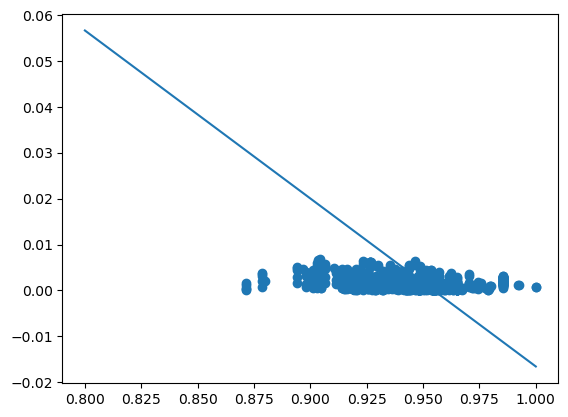

In [48]:
# Visualize the relationship between Y and X2

plt.scatter(df['water'],Y)
t = np.linspace(0.8,1.0,100)
plt.plot(t,0.35-0.3666*t)
plt.show()

This is not a very good visualization because we cannot see the behavior actually. The points are not only determined by the feature `water` but also other 3 features, that's why this line seems not fit well.

### Part 2: Collaborate, Refine, and Simulate the Model

After submitting your work in Part 1 in class, work in groups and compare your results. Collaborate, refine, and simulate your models.

Present your work in a Jupyter notebook including all parts in Part $1$ along with:
- Numerical solutions
- Visualizations of solutions
- Analysis and discussion of the results.

In addition, include a clearly labelled section at the end of your Jupyter notebook, where you discuss the improvements you have made and/or what steps have been taken to refine the model.

Students work collaboratively but submit their own final Jupyter notebook individually. Include names of all students with whom you collaborated in Part $2$.

#### Part 2 - Reflection 
This reflection should have two parts: 

1) Explain in a list of bullet points the changes you have made to your model in the version you are submitting and why you chose to make those changes. 

- Changed the format of the headings so that each step is easier to follow.
- Changed the units in the variables and paramters. In the exam, I don't have much time to work on it, and some went wrong.
- Added analysis: scale the features. I did this because standardize helps in logistic regression so I want to explore if scale would help in this model. For this model, the numbers are quite different, `water` is 0 to 1 but others are hundreds and thousands.
- Changed the final selection of model to be with `np.sqrt(y)` and `np.log(cement)`. Because this give us better $R^2_{adj}$
- Corrected the final equation. The previous one did in class forgot to change $Y$ to $\sqrt{Y}$.
- Addded discussion for the visualization.

2) In a paragraph or two reflect on the following prompts:
    - What part of the six modelling steps was the most challenging for you?
    - What helped you to identify any mistakes/misconceptions in your original model?
    - Do you think these techniques would be helpful for identifying mistakes/misconceptions in future assignments? Why or why not? 

- In this assignment, the mose challenging part is the analysis part. I got a pretty low $R^2_{adj}\approx0.4$, so I need to find some possible transformation to make this model better.
- One source of help definitely comes from my peers, through discussion, I got some idea. Also, I read throughly this assignment again, and I found some problem and some possible improvements.
- Yes! Talking to classmates is always a great way to get inspirations. Revisit and carefully examine would also be great for future assignments.